<a href="https://colab.research.google.com/github/AkashIT418/AkashIT418/blob/main/isaa_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timezone
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import sys

In [ ]:
from parse_pcap import pcap_to_pandas, send_rates

In [ ]:
data = pcap_to_pandas(r'D:\Downloads\WIRESHARK-DATASET.pcap')
data.head(5)

,datetime,dns_query,dns_resp,ip_dst,ip_dst_int,ip_src,ip_src_int,is_dns,length,mac_dst,mac_dst_int,mac_src,mac_src_int,port_dst,port_src,protocol,time,time_normed
0,2021-12-05 03:35:04,None,None,255.255.255.255,4.294967e+09,0.0.0.0,0.000000e+00,False,352,ff:ff:ff:ff:ff:ff,281474976710655,ac:67:5d:59:41:33,189559947739443,67.0,68.0,UDP,1638655504.756731,0.000000
1,2021-12-05 03:35:04,None,None,None,NaN,None,NaN,False,42,ff:ff:ff:ff:ff:ff,281474976710655,ac:67:5d:59:41:33,189559947739443,NaN,NaN,None,1638655504.768239,0.011508
2,2021-12-05 03:35:04,None,None,None,NaN,None,NaN,False,151,33:33:00:01:00:02,56294136414210,ac:67:5d:59:41:33,189559947739443,547.0,546.0,UDP,1638655504.771095,0.014364
3,2021-12-05 03:35:04,None,None,224.0.0.22,3.758096e+09,192.168.1.38,3.232236e+09,False,54,01:00:5e:00:00:16,1101088686102,ac:67:5d:59:41:33,189559947739443,NaN,NaN,None,1638655504.780094,0.023363
4,2021-12-05 03:35:04,None,None,239.255.102.18,4.026492e+09,192.168.1.38,3.232236e+09,False,1514,01:00:5e:7f:66:12,1101097035282,ac:67:5d:59:41:33,189559947739443,50001.0,57618.0,UDP,1638655504.785414,0.028683


In [ ]:
pkts = data
pkts.shape

(94874, 18)

In [ ]:
labels = pd.read_csv(r'C:\Users\AKASHP\Desktop\activity_2.txt', header=None, names=["time", "activity"])
labels

,time,activity
0,2021-12-05 03:35:04,INACTIVE
1,2021-12-05 03:37:01,AUDIO
2,2021-12-05 03:39:01,VIDEO
3,2021-12-05 03:41:01,WEB
4,2021-12-05 03:43:01,GAMING
5,2021-12-05 03:45:01,WEB


In [ ]:
'''from dateutil import tz

def convert_to_datetime(time):
    return datetime.strptime(time, '%Y-%m-%d %H:%M:%S')

labels['datetime'] = labels['time'].apply(convert_to_datetime)
labels['datetime'] = labels['time']
tzlocal = tz.gettz('CDT')
tzlocal = datetime.now().astimezone().tzinfo
labels['timestamp'] = labels['datetime'].apply(lambda dt: dt.replace(tzinfo=tzlocal).timestamp())'''

label_encoder = LabelEncoder()
labels['label'] = label_encoder.fit_transform(labels['activity'])
labels

,time,activity,label
0,2021-12-05 03:35:04,INACTIVE,2
1,2021-12-05 03:37:01,AUDIO,0
2,2021-12-05 03:39:01,VIDEO,3
3,2021-12-05 03:41:01,WEB,4
4,2021-12-05 03:43:01,GAMING,1
5,2021-12-05 03:45:01,WEB,4


In [ ]:
label_encoder.classes_

array([' AUDIO', ' GAMING', ' INACTIVE', ' VIDEO', ' WEB'], dtype=object)

In [ ]:
for index, row in labels.sort_values(by=['time']).iterrows():
    pkts.loc[data['datetime'] >= row['time'], 'label'] = row['label']
    pkts.loc[data['datetime'] >= row['time'], 'activity'] = row['activity']

pkts = pkts.loc[:,['datetime','length','ip_src','ip_dst','port_src','port_dst',
                   'protocol','dns_query','dns_resp','activity','label']]
pkts.shape

(245, 11)

In [ ]:
pkts = pkts.dropna()
pkts.head(50)

,datetime,length,ip_src,ip_dst,port_src,port_dst,protocol,dns_query,dns_resp,activity,label
162,2021-12-05 03:35:06,235,192.168.1.1,192.168.1.38,53.0,56279.0,UDP,b'boot-02.net.anydesk.com.',b'boot-02.net.anydesk.com.',INACTIVE,2.0
308,2021-12-05 03:35:07,187,192.168.1.1,192.168.1.38,53.0,50254.0,UDP,b'trouter2-azsc-asse-0-a.trouter.teams.microso...,b'trouter2-azsc-asse-0-a.trouter.teams.microso...,INACTIVE,2.0
309,2021-12-05 03:35:07,175,192.168.1.1,192.168.1.38,53.0,52884.0,UDP,b'trouter2-azsc-asse-0-a.trouter.teams.microso...,b'trouter2-azsc-asse-0-a.trouter.teams.microso...,INACTIVE,2.0
311,2021-12-05 03:35:07,175,192.168.1.1,192.168.1.38,53.0,52884.0,UDP,b'trouter2-azsc-asse-0-a.trouter.teams.microso...,b'trouter2-azsc-asse-0-a.trouter.teams.microso...,INACTIVE,2.0
312,2021-12-05 03:35:07,187,192.168.1.1,192.168.1.38,53.0,50254.0,UDP,b'trouter2-azsc-asse-0-a.trouter.teams.microso...,b'trouter2-azsc-asse-0-a.trouter.teams.microso...,INACTIVE,2.0
314,2021-12-05 03:35:07,219,192.168.1.1,192.168.1.38,53.0,64794.0,UDP,b'www.msftconnecttest.com.',b'www.msftconnecttest.com.',INACTIVE,2.0
315,2021-12-05 03:35:07,219,192.168.1.1,192.168.1.38,53.0,64794.0,UDP,b'www.msftconnecttest.com.',b'www.msftconnecttest.com.',INACTIVE,2.0
316,2021-12-05 03:35:07,175,192.168.1.1,192.168.1.38,53.0,52884.0,UDP,b'trouter2-azsc-asse-0-a.trouter.teams.microso...,b'trouter2-azsc-asse-0-a.trouter.teams.microso...,INACTIVE,2.0
319,2021-12-05 03:35:07,187,192.168.1.1,192.168.1.38,53.0,50254.0,UDP,b'trouter2-azsc-asse-0-a.trouter.teams.microso...,b'trouter2-azsc-asse-0-a.trouter.teams.microso...,INACTIVE,2.0
439,2021-12-05 03:35:08,186,192.168.1.1,192.168.1.38,53.0,51012.0,UDP,b'teams.microsoft.com.',b'teams.microsoft.com.',INACTIVE,2.0


In [ ]:
from sklearn.model_selection import train_test_split

'''X = pkts.loc[:,:'dns_resp']
y = pkts.loc[:,'label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_test.shape'''

"X = pkts.loc[:,:'dns_resp']\ny = pkts.loc[:,'label']\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)\nX_test.shape"

In [ ]:

X = pkts.loc[:,:'dns_resp']
y = pkts.loc[:,'label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
features = X_train.loc[:,['length','port_dst']].values
target = y_train.values
features.shape

(196, 2)

In [ ]:
target.shape

(196,)

In [ ]:
from sklearn.metrics import classification_report , accuracy_score,f1_score,precision_score,recall_score

acc_l=[]
f1_l=[]
prec_l=[]
rec_l=[]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(features,target)
y_pred = classifier.predict(X_test.loc[:,['length','port_dst']].values)
acc_l.append(accuracy_score(y_test,y_pred.round()))
f1_l.append(f1_score(y_test,y_pred.round(),average='weighted'))
prec_l.append(precision_score(y_test,y_pred.round(),average='weighted'))
rec_l.append(recall_score(y_test,y_pred.round(),average='weighted'))
print(accuracy_score(y_test,y_pred.round()))

0.673469387755102


D:\MOVIES\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test,y_pred.round()))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       0.00      0.00      0.00         4
         2.0       0.73      0.50      0.59        16
         3.0       0.00      0.00      0.00         1
         4.0       0.68      0.88      0.77        26

    accuracy                           0.67        49
   macro avg       0.48      0.48      0.47        49
weighted avg       0.64      0.67      0.64        49



D:\MOVIES\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.naive_bayes import ComplementNB
nb = ComplementNB() 
nb.fit(features, target)
y_pred2 = nb.predict(X_test.loc[:,['length','port_dst']].values)
acc_l.append(accuracy_score(y_test,y_pred2.round()))
f1_l.append(f1_score(y_test,y_pred2.round(),average='weighted'))
prec_l.append(precision_score(y_test,y_pred2.round(),average='weighted'))
rec_l.append(recall_score(y_test,y_pred2.round(),average='weighted'))
print(accuracy_score(y_test,y_pred2.round()))

0.5714285714285714


D:\MOVIES\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test,y_pred2.round()))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.00      0.00      0.00         4
         2.0       0.46      0.75      0.57        16
         3.0       0.00      0.00      0.00         1
         4.0       0.70      0.62      0.65        26

    accuracy                           0.57        49
   macro avg       0.23      0.27      0.24        49
weighted avg       0.52      0.57      0.53        49



D:\MOVIES\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(features,target)
y_pred1 = regressor.predict(X_test.loc[:,['length','port_dst']].values)
acc_l.append(accuracy_score(y_test,y_pred1.round()))
f1_l.append(f1_score(y_test,y_pred1.round(),average='weighted'))
prec_l.append(precision_score(y_test,y_pred1.round(),average='weighted'))
rec_l.append(recall_score(y_test,y_pred1.round(),average='weighted'))
print(accuracy_score(y_test,y_pred1.round()))

0.4489795918367347


D:\MOVIES\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test,y_pred1.round()))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.00      0.00      0.00         4
         2.0       0.60      0.38      0.46        16
         3.0       0.00      0.00      0.00         1
         4.0       0.80      0.62      0.70        26

    accuracy                           0.45        49
   macro avg       0.28      0.20      0.23        49
weighted avg       0.62      0.45      0.52        49



D:\MOVIES\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(69.0, 0.5, 'Actual')

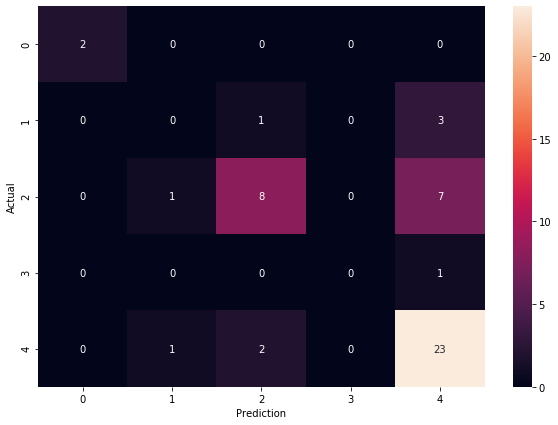

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred.round())
cm
# after creating the confusion matrix, for better understaning plot the cm.
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Actual')

Text(69.0, 0.5, 'Truth')

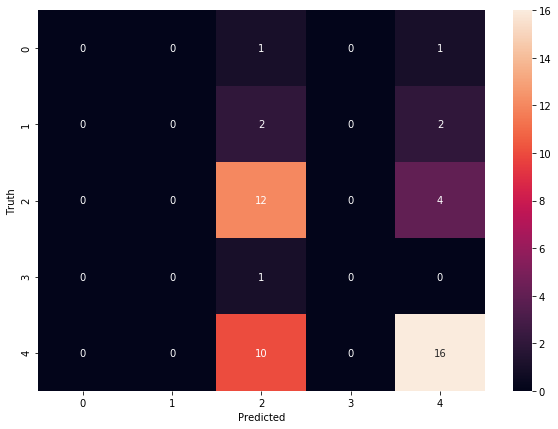

In [ ]:
cm2 = confusion_matrix(y_test, y_pred2.round())
cm2
# after creating the confusion matrix, for better understaning plot the cm.
plt.figure(figsize = (10,7))
sn.heatmap(cm2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(69.0, 0.5, 'Truth')

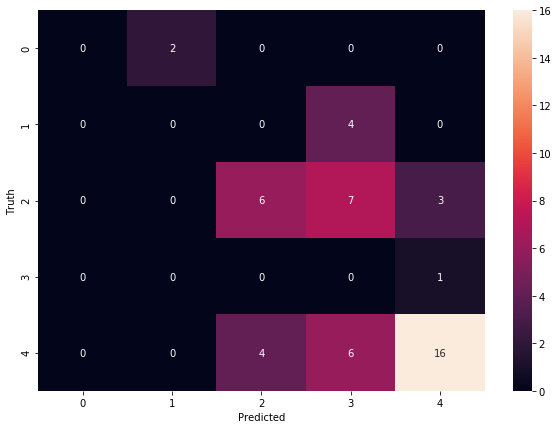

In [ ]:
cm1 = confusion_matrix(y_test, y_pred1.round())
cm1
# after creating the confusion matrix, for better understaning plot the cm.
plt.figure(figsize = (10,7))
sn.heatmap(cm1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

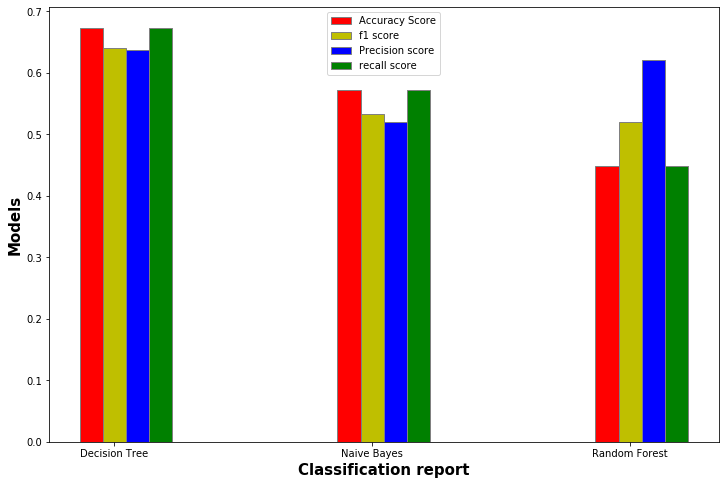

In [ ]:
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.09
fig = plt.subplots(figsize =(12, 8))
br1 = np.arange(len(acc_l))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
plt.bar(br1, acc_l, color ='r', width = barWidth,edgecolor ='grey', label ='Accuracy Score')
plt.bar(br2, f1_l, color ='y', width = barWidth,edgecolor ='grey', label ='f1 score')
plt.bar(br3, prec_l, color ='b', width = barWidth,edgecolor ='grey', label ='Precision score')
plt.bar(br4, rec_l, color ='g', width = barWidth,edgecolor ='grey', label ='recall score')
plt.xlabel('Classification report', fontweight ='bold', fontsize = 15)
plt.ylabel('Models', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(acc_l))],
        ['Decision Tree','Naive Bayes','Random Forest'])
 
plt.legend()
plt.show()